In [ ]:
import pandas as pd
import numpy as np
import io
import statistics

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Reliance_Stock.csv to Reliance_Stock.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Reliance_Stock.csv']))

In [ ]:
print (df)

            Date         Open         High          Low        Close  \
0     2015-06-08   453.399994   455.000000   441.549988   442.725006   
1     2015-06-09   441.774994   445.325012   438.674988   441.850006   
2     2015-06-10   443.000000   454.950012   442.500000   452.899994   
3     2015-06-11   453.000000   454.750000   436.825012   438.575012   
4     2015-06-12   439.500000   446.350006   439.125000   444.924988   
...          ...          ...          ...          ...          ...   
1224  2020-06-01  1480.000000  1538.349976  1475.949951  1520.349976   
1225  2020-06-02  1526.000000  1540.000000  1520.800049  1535.699951   
1226  2020-06-03  1545.000000  1560.000000  1533.349976  1541.650024   
1227  2020-06-04  1544.000000  1589.500000  1541.000000  1579.800049   
1228  2020-06-05  1595.000000  1618.000000  1573.699951  1581.699951   

        Adj Close      Volume  
0      425.550629   4958862.0  
1      424.709564   4184606.0  
2      435.330933   6176034.0  
3      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
df_close = df['Close']

In [ ]:
df_close.shape

(1229,)

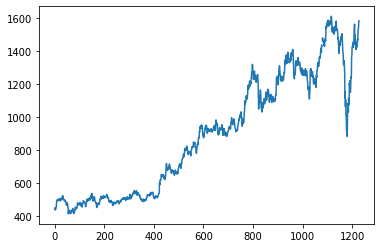

In [ ]:
plt.plot(df_close)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(1229, 1)

In [ ]:
df_close

array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

In [ ]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

402.79104778957594

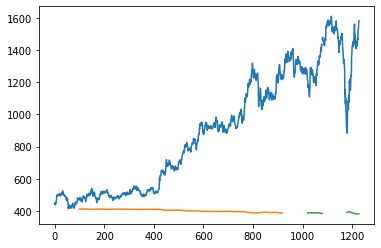

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
df.head()

,Price Date,States,Commodity,Modal Price (Rs./Quintal)
0,14 Jul 2020,Delhi,Apple,3333
1,14 Jul 2020,Delhi,Apple,10000
2,13 Jul 2020,Delhi,Apple,3021
3,13 Jul 2020,Delhi,Apple,10000
4,11 Jul 2020,Delhi,Apple,3021


In [ ]:
df.tail()

,Price Date,States,Commodity,Modal Price (Rs./Quintal)
5656,02 Jan 2014,Delhi,Apple,4552
5657,02 Jan 2014,Delhi,Apple,8931
5658,01 Jan 2014,Delhi,Apple,3581
5659,01 Jan 2014,Delhi,Apple,4792
5660,01 Jan 2014,Delhi,Apple,8813
